
# Project: Investigate a Dataset - [No_show_appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset contains information from alot of medical appointments in Brazil and and the question we have is what factors affect on patients cause showing or no-showing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

* at first i will gather the data by using "read"
* then i will change the name of columns
* then i will use "drop" method to delete columns i didn't use

In [2]:
# load a dataset
df_show = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df_show.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# changing the name of columns
df_show.columns = ['patientid', 'appointmentid', 'gender', 'scheduledday', 
              'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hypertension',
              'diabetes', 'alcoholism', 'handicap', 'smsreceived', 'noshow']

df_show.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,smsreceived,noshow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# the number of rows and columns 
df_show.shape

(110527, 14)

 * from this we will know a dataset have 110527 rows and 14 columns 

In [5]:
#check if there are any missing data
df_show.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110527 non-null float64
appointmentid     110527 non-null int64
gender            110527 non-null object
scheduledday      110527 non-null object
appointmentday    110527 non-null object
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hypertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handicap          110527 non-null int64
smsreceived       110527 non-null int64
noshow            110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


* No missing any data

In [6]:
#describe
df_show.describe()

,patientid,appointmentid,age,scholarship,hypertension,diabetes,alcoholism,handicap,smsreceived
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


* the avarage of ages is 37 years.
* the maximum age is 115 years.
* there is a problem with a minimum age.

### Data Cleaning

In [7]:
#delete columns which i think it will not help me 
df_show = df_show.drop(['patientid' , 'appointmentid'] , axis = 1 )

In [8]:
#changing the tybe of two columns to datetime
df_show['scheduledday'] = pd.to_datetime(df_show['scheduledday'])
df_show['appointmentday'] = pd.to_datetime(df_show['appointmentday'])
#making a new column include the time difference from AppointmentDay to ScheduledDay
timedifference = (df_show['appointmentday'] - df_show['scheduledday']).dt.days
df_show['timedifference'] = timedifference
df_show.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
gender            110527 non-null object
scheduledday      110527 non-null datetime64[ns, UTC]
appointmentday    110527 non-null datetime64[ns, UTC]
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hypertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handicap          110527 non-null int64
smsreceived       110527 non-null int64
noshow            110527 non-null object
timedifference    110527 non-null int64
dtypes: datetime64[ns, UTC](2), int64(8), object(3)
memory usage: 11.0+ MB


In [9]:
#delete columns which i think it will not help me
df_show = df_show.drop(['appointmentday' , 'scheduledday'] , axis = 1 )

In [10]:
#replace all data are illogical with the average
meanage = df_show['age'].mean()
for x in df_show.index:
    if df_show.loc[x, "age"] < 0:
        df_show.loc[x, "age"] = meanage 

In [11]:
#replace all data are illogical with the average
meantime = df_show['timedifference'].mean()
for x in df_show.index:
    if df_show.loc[x, "timedifference"] < 0:
        df_show.loc[x, "timedifference"] = meantime

In [12]:
df_show.head(20)

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,smsreceived,noshow,timedifference
0,F,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No,9.183702
1,M,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No,9.183702
2,F,62.0,MATA DA PRAIA,0,0,0,0,0,0,No,9.183702
3,F,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No,9.183702
4,F,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No,9.183702
5,F,76.0,REPÚBLICA,0,1,0,0,0,0,No,1.000000
6,F,23.0,GOIABEIRAS,0,0,0,0,0,0,Yes,1.000000
7,F,39.0,GOIABEIRAS,0,0,0,0,0,0,Yes,1.000000
8,F,21.0,ANDORINHAS,0,0,0,0,0,0,No,9.183702
9,F,19.0,CONQUISTA,0,0,0,0,0,0,No,1.000000


<a id='eda'></a>
## Exploratory Data Analysis




## General look

Text(0.5, 0, 'age')

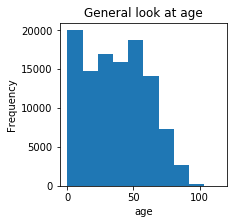

In [33]:
# histogram shows General look at age
df_show['age'].plot(kind='hist' , figsize=(3,3))
plt.title('General look at age')
plt.xlabel('age')


Text(0.5, 0, 'scholarship')

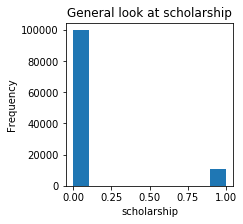

In [34]:
#histogram shows General look at scholarship
df_show['scholarship'].plot(kind='hist' , figsize=(3,3))
plt.title('General look at scholarship')
plt.xlabel('scholarship')

Text(0.5, 0, 'hypertension')

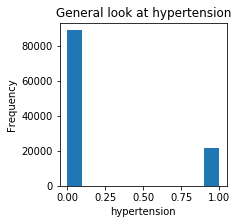

In [35]:
#histogram shows General look at hypertension
df_show['hypertension'].plot(kind='hist' , figsize=(3,3))
plt.title('General look at hypertension')
plt.xlabel('hypertension')

Text(0.5, 0, 'diabetes')

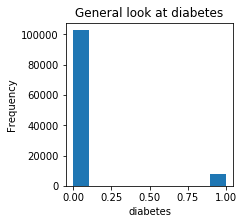

In [36]:
#histogram shows General look at diabetes
df_show['diabetes'].plot(kind='hist' , figsize=(3,3))
plt.title('General look at diabetes')
plt.xlabel('diabetes')

Text(0.5, 0, 'alcoholism')

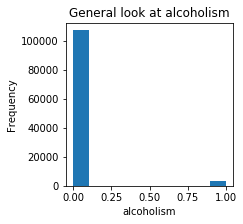

In [37]:
#histogram shows General look at alcoholism
df_show['alcoholism'].plot(kind='hist' , figsize=(3,3))
plt.title('General look at alcoholism')
plt.xlabel('alcoholism')

Text(0.5, 0, 'handicap')

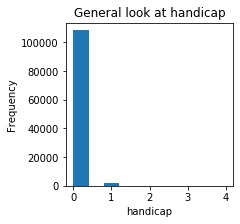

In [38]:
#histogram shows General look at handicap
df_show['handicap'].plot(kind='hist' , figsize=(3,3))
plt.title('General look at handicap')
plt.xlabel('handicap')

Text(0.5, 0, 'smsreceived')

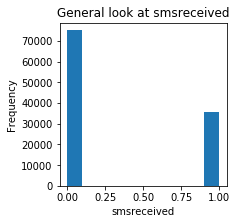

In [39]:
#histogram shows General look at smsreceived
df_show['smsreceived'].plot(kind='hist' , figsize=(3,3))
plt.title('General look at smsreceived')
plt.xlabel('smsreceived')

Text(0.5, 0, 'timedifference')

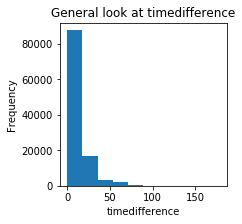

In [40]:
#histogram shows General look at timedifference
df_show['timedifference'].plot(kind='hist' , figsize=(3,3))
plt.title('General look at timedifference')
plt.xlabel('timedifference')

 * patients who received the message about 50% from patients who did not
 * Most patients did not suffer from diabetes,alcoholism,handcap
 * most patients did not have scholarship
 * more than 20,000 patient suffered from hipertension
 * The time difference is inversely proportional to the number of patients 

## more detailed analysis 


## does the gender effect on the decision?

In [21]:
#make a dataframe for patients who show and dataframe for patients who noshow
df_yes =df_show[df_show['noshow'] == 'No']
df_no =df_show[df_show['noshow'] == 'Yes']

In [30]:
#Calculate the number of attendees and the number of non-attendants based on gender
gender_percentage = df_show.groupby('gender').noshow.value_counts()
gender_percentage

gender  noshow
F       No        57246
        Yes       14594
M       No        30962
        Yes        7725
Name: noshow, dtype: int64

In [31]:
# Calculate the percentage of non-attendants based on gender
def print_gender_percentage():
    total = len(df_show.index)
    f_gender_percentage = (gender_percentage['F']['Yes']/total) * 100
    m_gender_percentage = (gender_percentage['M']['Yes']/total) * 100
    print("{}% of females did not show the appointment".format(f_gender_percentage.round(2)))
    print("{}% of males did not show the appointment.".format(m_gender_percentage.round(2)))
print_gender_percentage()

13.2% of females did not show the appointment
6.99% of males did not show the appointment.


## does the age effect on the decision?

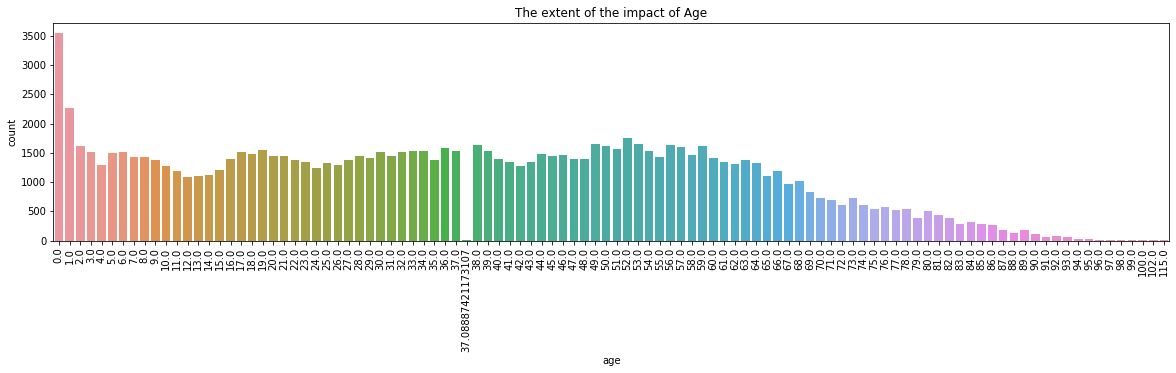

In [21]:
#The extent of the impact of Age
plt.figure(figsize=(20,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df_show.age)
ax.set_title('The extent of the impact of Age')
plt.show()

* patients in the age from 0 to 10 years are showed more than any another age stage Regardless of the mean age

## does the timedifference effect on the decision?

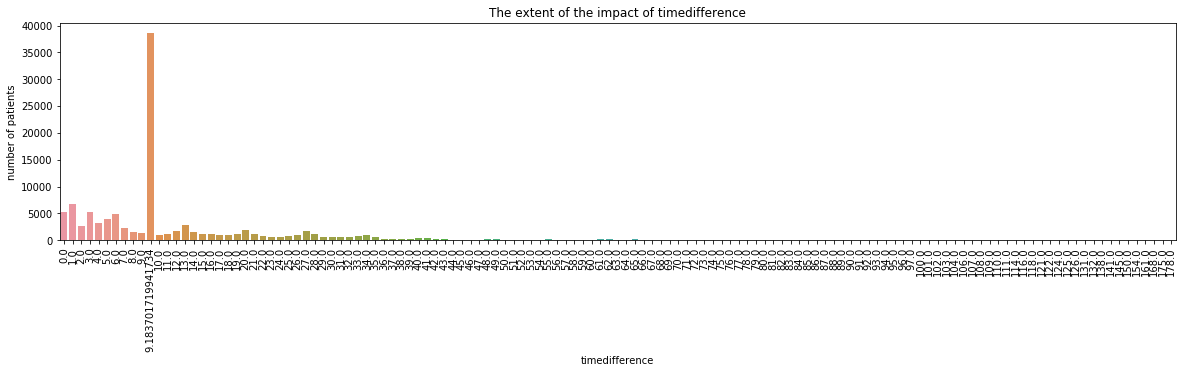

In [22]:
#The extent of the impact of timedifference
plt.figure(figsize=(20,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df_show.timedifference)
ax.set_title('The extent of the impact of timedifference')
plt.ylabel('number of patients')
plt.show()

* The time difference is inversely proportional to the number of patients Regardless of the mean

## does the sms receiving effect on the decision?

Text(0, 0.5, 'patients')

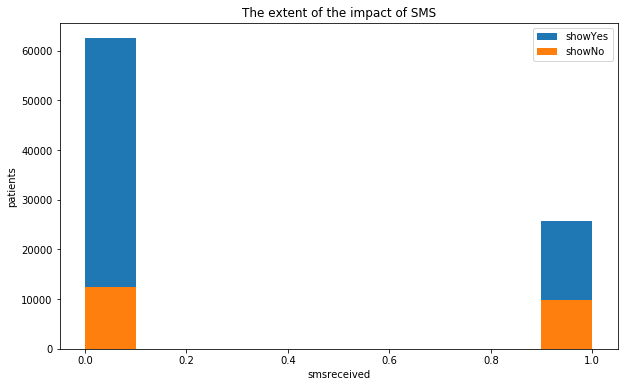

In [62]:
#The extent of the impact of SMS
plt.figure(figsize=[10,6])
df_yes['smsreceived'].plot(kind='hist',label = 'showYes')
df_no['smsreceived'].plot(kind='hist' , label = 'showNo')
plt.legend()
plt.title('The extent of the impact of SMS')
plt.xlabel('smsreceived')
plt.ylabel('patients')

* very strange : a lot of patients showed without receiving SMS

Text(0, 0.5, 'patients')

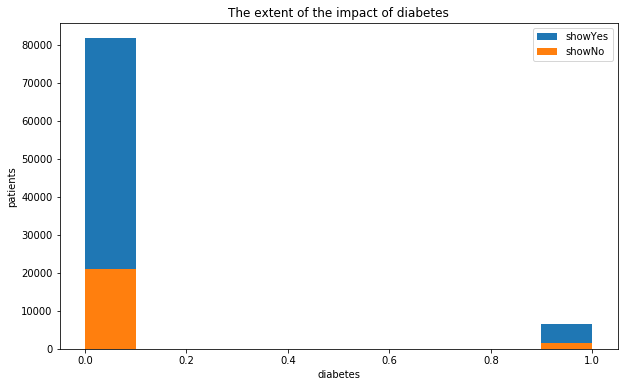

In [63]:
#The extent of the impact of diabetes
plt.figure(figsize=[10,6])
df_yes['diabetes'].plot(kind='hist' , label = 'showYes')
df_no['diabetes'].plot(kind='hist' , label = 'showNo')
plt.legend()
plt.title('The extent of the impact of diabetes')
plt.xlabel('diabetes')
plt.ylabel('patients')

Text(0, 0.5, 'patients')

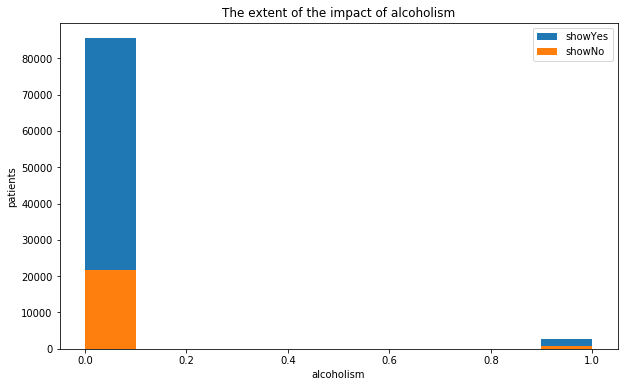

In [64]:
#The extent of the impact of alcoholism
plt.figure(figsize=[10,6])
df_yes['alcoholism'].plot(kind='hist' , label = 'showYes')
df_no['alcoholism'].plot(kind='hist' , label = 'showNo')
plt.legend()
plt.title('The extent of the impact of alcoholism')
plt.xlabel('alcoholism')
plt.ylabel('patients')

Text(0, 0.5, 'patients')

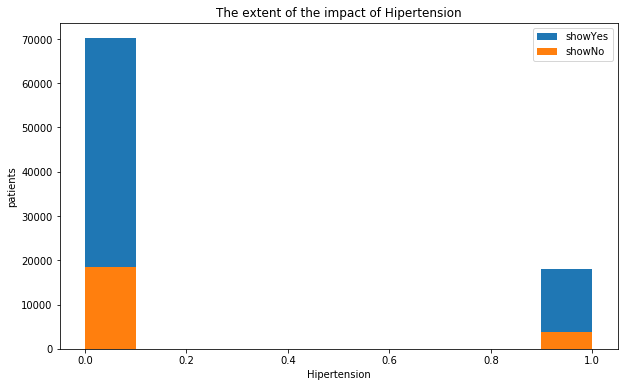

In [65]:
#The extent of the impact of Hipertension
plt.figure(figsize=[10,6])
df_yes['hypertension'].plot(kind='hist' , label = 'showYes')
df_no['hypertension'].plot(kind='hist' , label = 'showNo')
plt.legend()
plt.title('The extent of the impact of Hipertension')
plt.xlabel('Hipertension')
plt.ylabel('patients')

Text(0, 0.5, 'patients')

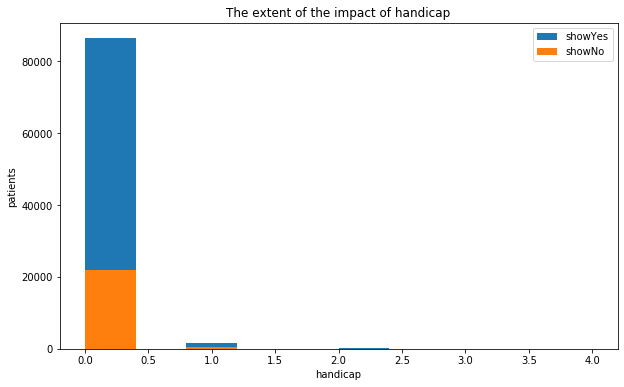

In [66]:
#The extent of the impact of handicap
plt.figure(figsize=[10,6])
df_yes['handicap'].plot(kind='hist' , label = 'showYes')
df_no['handicap'].plot(kind='hist' , label = 'showNo')
plt.legend()
plt.title('The extent of the impact of handicap')
plt.xlabel('handicap')
plt.ylabel('patients')

Text(0, 0.5, 'patients')

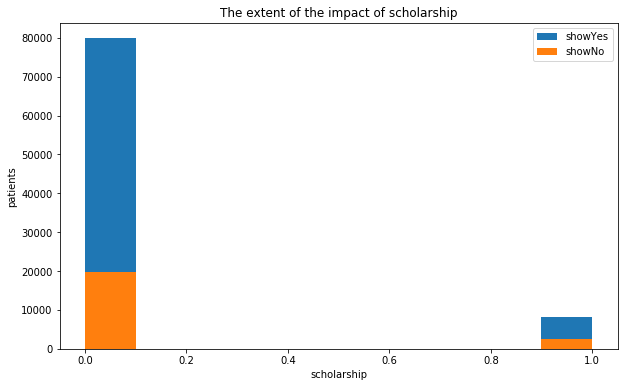

In [67]:
#The extent of the impact of scholarship
plt.figure(figsize=[10,6])
df_yes['scholarship'].plot(kind='hist' , label = 'showYes')
df_no['scholarship'].plot(kind='hist' , label = 'showNo')
plt.legend()
plt.title('The extent of the impact of scholarship')
plt.xlabel('scholarship')
plt.ylabel('patients')

* Scholarship,Hipertension,Diabetes,Alcoholism and Handcap are insignificant

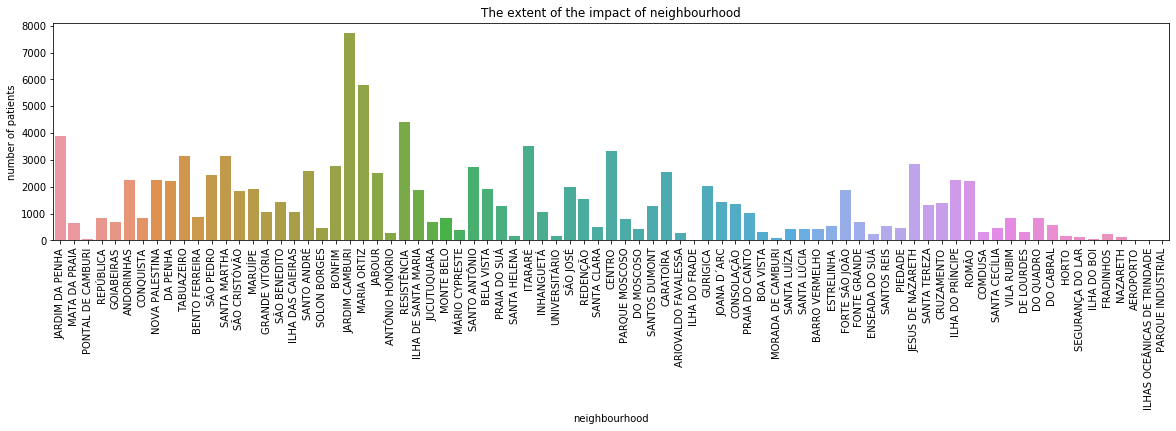

In [59]:
#The extent of the impact of neighbourhood
plt.figure(figsize=(20,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df_show.neighbourhood)
ax.set_title('The extent of the impact of neighbourhood')
plt.ylabel('number of patients')
plt.show()

* "jardam camburi" is the city with the most number of patients

<a id='conclusions'></a>
## Conclusions
* "jardam camburi" is the city with the most number of patients
* Scholarship,Hipertension,Diabetes,Alcoholism,Handcap are insignificant.
* patients in the age from 0 to 10 years are showed more than any another age stage.
* a lot of patients showed without receiving SMS and it is illogical.


### Limitations

* could not find any relation between the most characteristics like Scholarship,Hipertension,Diabetes,Alcoholism,Handcap and patients showing or no showing 
